<a href="https://colab.research.google.com/github/nicklausmillican/StatisticalRethinkingIISolutions/blob/main/StatisticalRethinkingSolutions2_Ch11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Checking versions of g++ and make
system("g++ --version", intern = TRUE)
system("make --version", intern = TRUE)

# Install g++ and make if needed
system("sudo apt install g++", intern = TRUE)
system("sudo apt install make", intern = TRUE)


[1] "g++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0"                                  
[2] "Copyright (C) 2021 Free Software Foundation, Inc."                          
[3] "This is free software; see the source for copying conditions.  There is NO" 
[4] "warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE."
[5] ""

[1] "GNU Make 4.3"                                                                 
[2] "Built for x86_64-pc-linux-gnu"                                                
[3] "Copyright (C) 1988-2020 Free Software Foundation, Inc."                       
[4] "License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>"
[5] "This is free software: you are free to change and redistribute it."           
[6] "There is NO WARRANTY, to the extent permitted by law."

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "g++ is already the newest version (4:11.2.0-1ubuntu1)."         
[5] "g++ set to manually installed."                                 
[6] "0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded."

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "make is already the newest version (4.3-4.1build1)."            
[5] "make set to manually installed."                                
[6] "0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded."

In [ ]:
# Install cmdstanr from GitHub
if (!require(cmdstanr)) {
  devtools::install_github("stan-dev/cmdstanr")
}

# Set up CmdStan if it's not already set up
library(cmdstanr)
if (!cmdstanr::cmdstan_version()) {
  cmdstanr::install_cmdstan()
}

# Verify installation
cmdstanr::check_cmdstan_toolchain()


Loading required package: cmdstanr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘cmdstanr’”



cli          (3.6.2  -> 3.6.3     ) [CRAN]
numDeriv     (NA     -> 2016.8-1.1) [CRAN]
rlang        (1.1.3  -> 1.1.4     ) [CRAN]
backports    (1.4.1  -> 1.5.0     ) [CRAN]
ps           (1.7.6  -> 1.7.7     ) [CRAN]
matrixStats  (NA     -> 1.3.0     ) [CRAN]
distribut... (NA     -> 0.4.0     ) [CRAN]
tensorA      (NA     -> 0.36.2.1  ) [CRAN]
checkmate    (NA     -> 2.3.1     ) [CRAN]
abind        (NA     -> 1.4-5     ) [CRAN]
processx     (3.8.3  -> 3.8.4     ) [CRAN]
posterior    (NA     -> 1.5.0     ) [CRAN]
data.table   (1.15.0 -> 1.15.4    ) [CRAN]


Installing 13 packages: cli, numDeriv, rlang, backports, ps, matrixStats, distributional, tensorA, checkmate, abind, processx, posterior, data.table

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpsXh7t2/remotes15b13f0658c/stan-dev-cmdstanr-2550b8e/DESCRIPTION’ ... OK
* preparing ‘cmdstanr’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘cmdstanr_0.8.1.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

This is cmdstanr version 0.8.1.9000

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan



ERROR: Error: CmdStan path has not been set yet. See ?set_cmdstan_path.


IF YOU ENCOUNTER AN ERROR, JUST KEEP RUNNING CODE BELOW.

In [ ]:
# Install CmdStan using cmdstanr
library(cmdstanr)
cmdstanr::install_cmdstan()

# After installation, set the CmdStan path
cmdstan_path <- cmdstanr::cmdstan_path()
cmdstanr::set_cmdstan_path(cmdstan_path)

# Verify the installation
cmdstanr::cmdstan_version()


The C++ toolchain required for CmdStan is setup properly!

* Latest CmdStan release is v2.35.0

* Installing CmdStan v2.35.0 in /root/.cmdstan/cmdstan-2.35.0

* Downloading cmdstan-2.35.0.tar.gz from GitHub...

* Download complete

* Unpacking archive...

* Building CmdStan binaries...



cp bin/linux-stanc bin/stanc
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials -DNO_FPRINTF_OUTPUT     -O3  -c -x c -include stan/lib/stan_math/lib/sundials_6.1.1/include/stan_sundials_printf_override.hpp stan/lib/stan_math/lib/sundials_6.1.1/src/nvector/serial/nvector_serial.c -o stan/lib/stan_math/lib/sundials_6.1.1/src/nvector/serial/nvector_serial.o
chmod +x bin/stanc
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials -DNO_FPRINTF_OUTPUT     -O3  -c -x c -include stan/lib/stan_math/lib/sundials_6.1.1/include/stan_sundials_printf_override.hpp stan/lib/stan_math/lib/sundials_6.1.1/src/sundials/sundials_math.c -o stan/lib/stan_math/lib/sundials_6.1.1/src/sundials/sundials_math.o
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1

* Finished installing CmdStan to /root/.cmdstan/cmdstan-2.35.0


CmdStan path set to: /root/.cmdstan/cmdstan-2.35.0

CmdStan path set to: /root/.cmdstan/cmdstan-2.35.0



[1] "2.35.0"

In [ ]:
# Install necessary packages
install.packages(c("coda", "mvtnorm", "devtools", "loo", "dagitty", "shape"))

# Load devtools for GitHub installation
library(devtools)

# Install rethinking from GitHub
devtools::install_github("rmcelreath/rethinking")


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘Rcpp’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’, ‘V8’


Loading required package: usethis





── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpsXh7t2/remotes15b9f7d8f0/rmcelreath-rethinking-f3ac8de/DESCRIPTION’ ... OK
* preparing ‘rethinking’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘rethinking_2.40.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(rethinking)

Loading required package: posterior

This is posterior version 1.5.0


Attaching package: ‘posterior’


The following objects are masked from ‘package:stats’:

    mad, sd, var


The following objects are masked from ‘package:base’:

    %in%, match


Loading required package: parallel

rethinking (Version 2.40)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




In [ ]:
# Test Installation

## Simulate some data for a binary outcome based on a single predictor
n <- 100
x <- rnorm(n)
prob <- 1 / (1 + exp(-x))
y <- rbinom(n, 1, prob)

## Fit a logistic regression using ulam
fit <- ulam(
  alist(
    y ~ bernoulli( p ),
    logit(p) <- a + b*x,
    a ~ normal(0, 1),
    b ~ normal(0, 1)
  ), data = list(x = x, y = y)
)

precis(fit)

Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.1 seconds.


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,-0.1380303,0.2117715,-0.4874136,0.1795349,0.998766,300.653
b,0.8043099,0.2233048,0.4502247,1.1659421,1.012772,226.636


# Chapter 11

## Easy

### 11E1
If an event has probability 0.35, what are the log-odds of this event?

#### Answer
We just need to definition of log odds.
> $\text{Odds} = \frac{p}{1-p}$

> $\text{log-Odds} = \text{ln}\left(\frac{p}{1-p}\right)$

So for our problem
> $\text{log-Odds}(0.35) = \text{ln}\left(\frac{0.35}{1-0.35}\right)
= \text{ln}\left(\frac{0.35}{0.65}\right) \approx -0.62$

In [ ]:
log(0.35 / (1-0.35))

[1] -0.6190392

### 11E2
If an event has log-odds 3.2, what is the probability of this event?

#### Answer
We can find this in R pretty easily:

In [ ]:
logistic(3.2)

[1] 0.9608343

But I think it's worth knowing to calculate this by hand.

> $\text{log-odds} = 3.2 = \text{ln}\left(\frac{p}{1-p}\right)
\rightarrow e^{3.2} = \frac{p}{1-p}
\rightarrow (1-p)e^{3.2} = e^{3.2} - pe^{3.2} = p
\rightarrow e^{3.2} = p + pe^{3.2} = p(1 + e^{3.2})
\rightarrow p = \frac{e^{3.2}}{1 + e^{3.2}} \approx 0.961 $

### 11E3
Suppose that a coefficient in a logistic regression has value 1.7. What does this imply about  the proportional change in odds of the outcome?

#### Answer
First on the *log-odds* scale, a coefficient of 1.7 means that the log-odds increases *additively* by 1.7 for a one-unit increase in the corresponding predictor variable: $\text{ln}\left(\frac{p}{1-p}\right) = ... + 1.7x$.  To get this to the *odds* scale, we exponentiate both sides: $\frac{p}{1-p} = ... \times e^{1.7x}$ such that the odds increase *multiplicatively* by $e^{1.7}$ for a one-unit increase in $x$.

### 11E4
Why do Poisson regressions sometimes require the use of an *offset*?  Provide an example.

#### Answer
In short, an offset is required when the outcome is something like a rate--a fraction where the numerator is the number of events and the denominator is something like attempts, space, time, or exposure--where the value of the denominator may vary among observations.  In this case, our model might look like

$$g\left(\frac{y}{m}\right) = \alpha + \beta_1 x_1 + ... + \beta_p x_p$$

The problem is that we don't have a GLM that can accomodate fractional outcomes.  But say we take $g(.)$ to be $\text{ln}(.)$; then we have

$$\text{ln}\left(\frac{y}{m}\right) = \text{ln}(y) - \text{ln}(m) = \alpha + \beta_1 x_1 + ... + \beta_p x_p$$.

Now we can take $\text{ln}(m)$ over to the other side to get

$$\text{ln}(y) = \text{ln}(m) + \alpha + \beta_1 x_1 + ... + \beta_p x_p$$

where $\text{ln}(m)$ is the offset.  So what we're left with is a Poisson regression with an offset.

## Medium

### 11M1
As explained in the chapter, binomial data can be organized in aggregated and disaggregated  forms, without any impact on inference. But the likelihood of the data does change when the data are  converted between the two formats. Can you explain why?

#### Answer
From the chimpanzee example in the chapter, aggregated data may look like

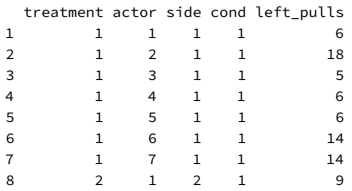

where the outcome `left_pulls` is a sum of "successes" across trials.  Conversely, disaggregated data may look like

|treatment|actor|side|cond|left_pull|
|---------|-----|----|----|---------|
|1|1|1|1|0|
|1|1|1|1|0|
|1|1|1|1|1|
|...|...|...|...|...|
|2|7|2|4|1|

where each trial is described on a single line.

These data formats require different likelihoods.  Both can use binomial likelihoods, but the aggregated data must account for the fact that multiple trials are represented in a single row like `left_pulls ~ dbinom(18, p)`, while the disaggregated data does not (`left_pull ~ dbinom(1, p)`).  In math notation, the disaggregated likelihood looks like $p^y(1-p)^{1-y}$ while the aggregated likelihood looks like $\frac{y!}{y!(n-y)!}p^y(1-p)^{n-y}$ $y$ is the outcome and $n=18$ is the number of trials.

### 11M2
If a coefficient in a Poisson regression has value 1.7, what does this imply about the change in the outcome?

#### Answer
Let's get aquainted with the Poisson regression; for illustration, we'll assume a single intercept and a single explanatory variable $X$:
$$ y \sim Poisson(\lambda)$$
$$ \text{ln}(\lambda) = \alpha + \beta x$$

So we can rewrite the linear model as
$$ \lambda = \text{exp}(\alpha + \beta x) = e^\alpha e^{\beta x}$$

So what happens to $\lambda$ when $x$ increases by 1 unit?  How does $\lambda_{x+1}$ compare with $\lambda_x$?
$$\frac{\lambda_{x+1}}{\lambda_x} = \text{exp}[(\alpha + \beta (x+1)) - (\alpha + \beta x)] = \frac{\text{exp}(\alpha + \beta (x+1))}{\text{exp}(\alpha + \beta x)} = \frac{e^\alpha e^{\beta (x+1)}}{e^\alpha e^{\beta x}} = \frac{e^{\beta x+ \beta}}{e^{\beta x}} = \frac{e^{\beta x} e^{\beta}}{e^{\beta x}} = e^\beta$$

Thus, a 1-unit change in $X$ results in an $e^\beta$ change in $\lambda_{x+1}$ compared to $\lambda_x$.  Here, if $\beta = 1.7$, there is proportional change to $\lambda_{x+1}$ of $e^{1.7} \approx 5.47$